In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in data for forcing, 1/4 degree case, and 1/32 degree case:

In [2]:
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
forcing=xr.open_dataset('NW2_forcing.nc', decode_times=False) #This is forcing for the 1/8 degree case (identical to other resolutions)

#1/4 degree resolution:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs025 = xr.open_dataset('static.nc', decode_times=False)
av025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

#1/32 degree resolution:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs003125 = xr.open_dataset('static.nc', decode_times=False)
av003125 = xr.open_dataset('averages_00002702.nc', decode_times=False)  #5-day averages
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
depth = fs025['depth_ocean']
grid= Grid(forcing, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

taux = forcing.taux[0,:,:]
taux = grid.interp(taux,axis='X')

## Plotting zonal wind forcing (taux) and depth

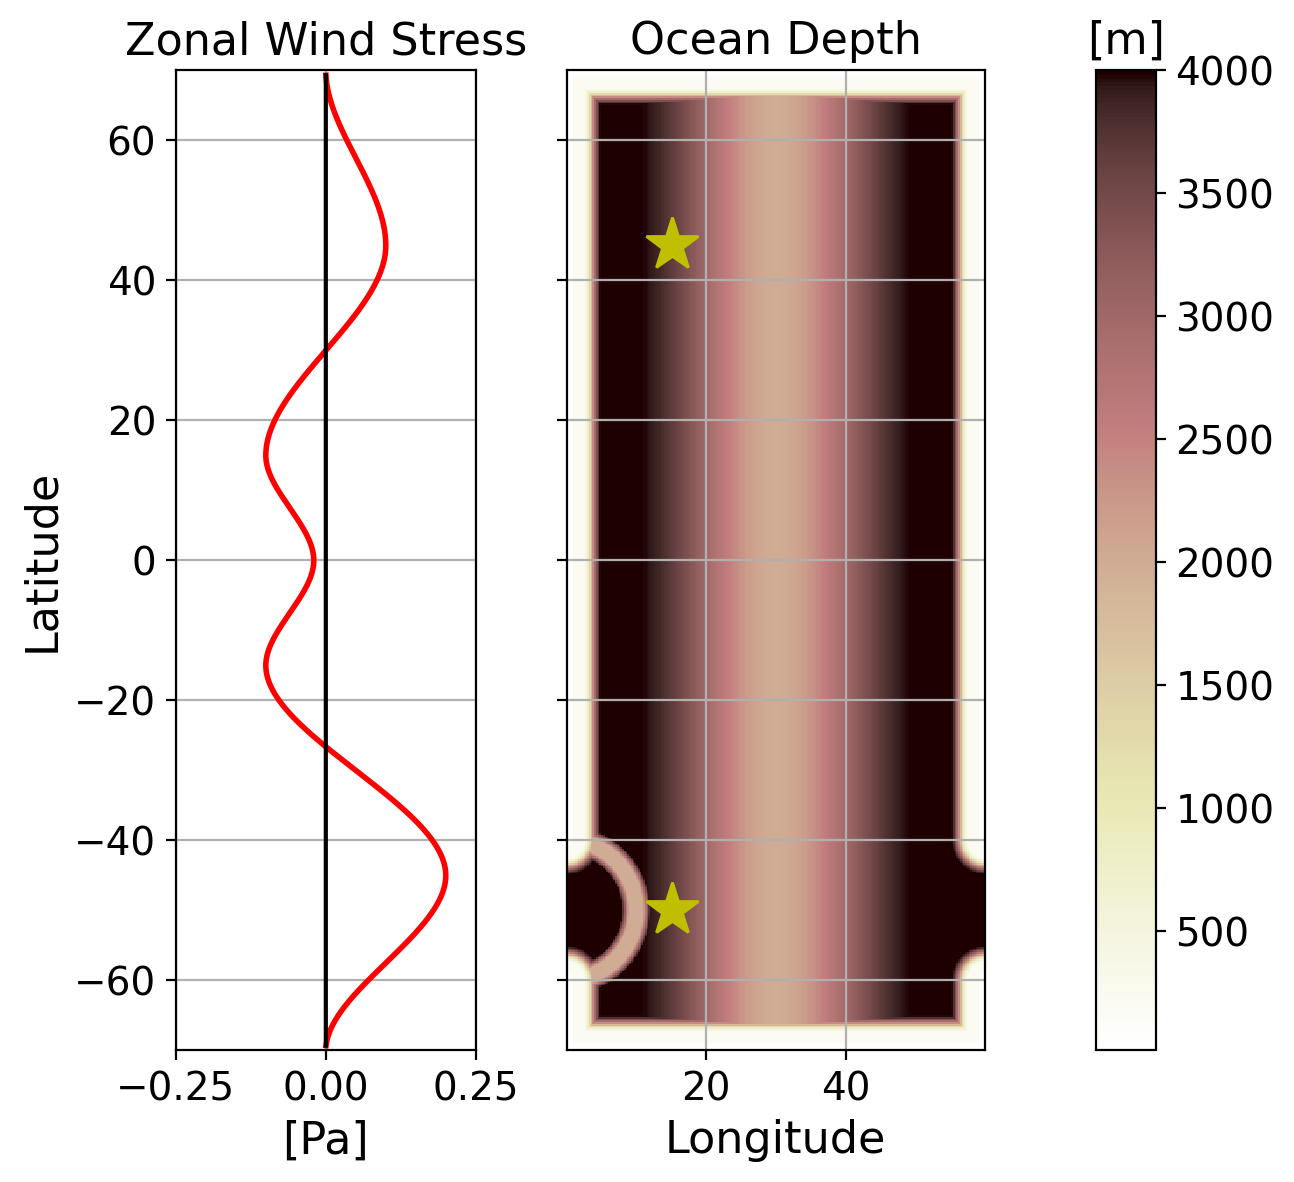

In [4]:

fig = plt.figure(figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.15,0.7]) 

ax3 = fig.add_axes([0.3,0.2,0.3,0.7])
ax4 = fig.add_axes([.61, 0.2, 0.03, 0.7])

ax1.set_title('Zonal Wind Stress',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.set_xlabel('[Pa]',fontsize=16)

ax1.tick_params(labelsize=14); 
ax1.set_xlim([-0.25,.25])
ax1.set_ylim([-70,70])
plotted =ax1.plot(taux[:,100],taux.yh,'r',linewidth=2)
plotted =ax1.plot(taux[:,100]*0,taux.yh,'k')



plotted =ax3.pcolor(depth.xh,depth.yh,depth,cmap='pink_r')
ax3.plot(depth.xh[60],depth.yh[460],'*',Markersize=20,color='y')
ax3.plot(depth.xh[60],depth.yh[80],'*',Markersize=20,color='y')
ax3.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax4, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
ax3.set_title('Ocean Depth',fontsize=16)
ax4.set_title('[m]',fontsize=16)
ax3.set_xlabel('Longitude',fontsize=16)
ax3.axes.yaxis.set_ticklabels([])

ax3.set_ylim([-70,70])
ax3.tick_params(labelsize=14); 
ax4.tick_params(labelsize=14)
ax1.grid('on')
ax3.grid('on')
plt.show()

## Plotting KE Snapshots

In [5]:
grid= Grid(av025, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

SSU = av025.u[-1,0,:]; SSU=grid.interp(SSU,axis='X')
SSV = av025.v[-1,0,:]; SSV=grid.interp(SSV,axis='Y')
KE_surf025 =0.5*(SSU**2+SSV**2) 

grid= Grid(av003125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

SSU = av003125.u[-1,0,:]; SSU=grid.interp(SSU,axis='X')
SSV = av003125.v[-1,0,:]; SSV=grid.interp(SSV,axis='Y')
KE_surf003125 =0.5*(SSU**2+SSV**2) 

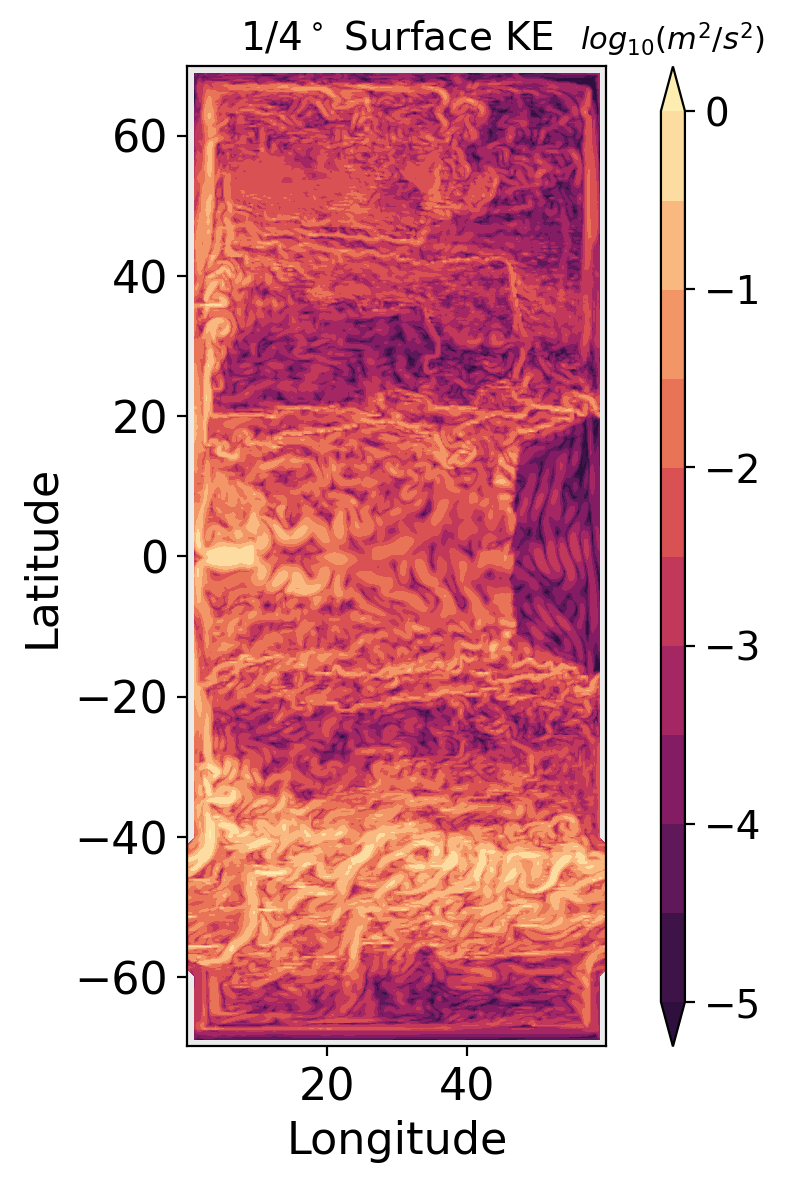

In [6]:
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('1/4$^\circ$ Surface KE',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)

levels=np.linspace(-5,0,11)
plotted =ax1.contourf(fs025.xh,fs025.yh,np.log10(KE_surf025),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);

plt.show()

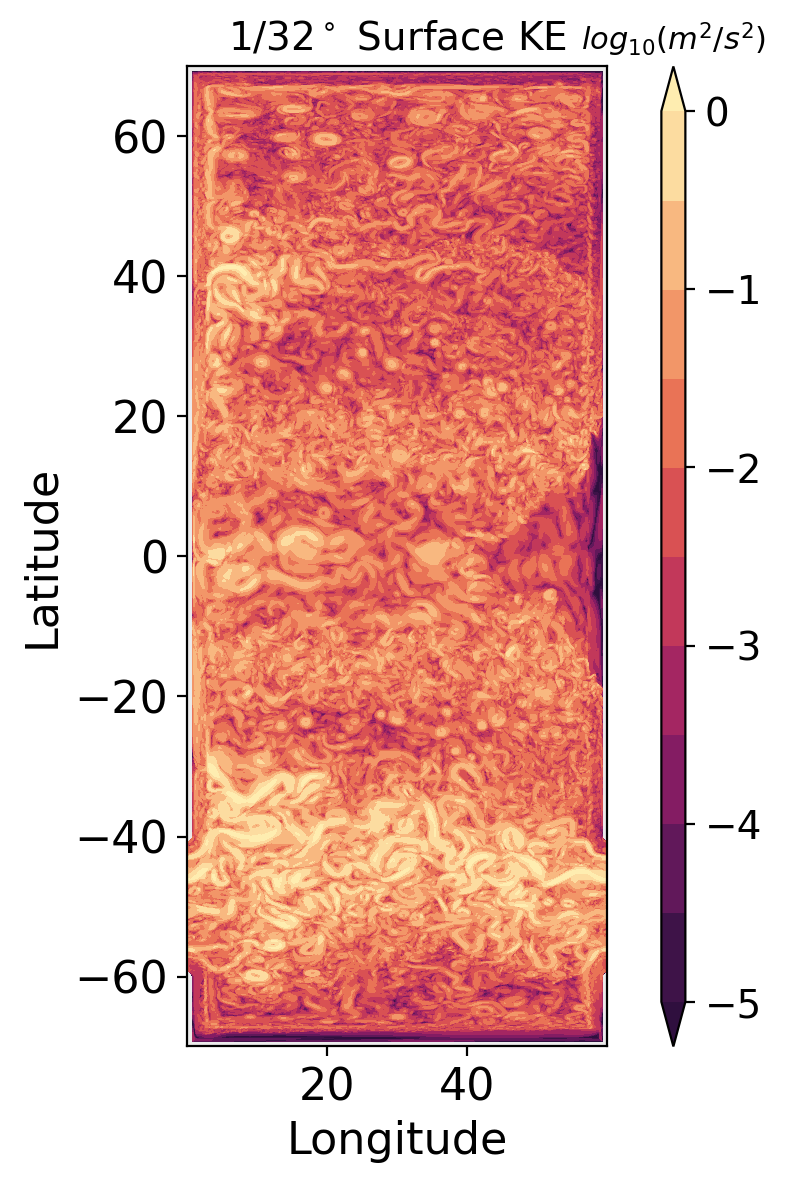

In [7]:
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)

levels=np.linspace(-5,0,11)
plotted =ax1.contourf(fs003125.xh,fs003125.yh,np.log10(KE_surf003125),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);

plt.show()